# Practical 5: Introduction to exiobase

Based on [Exiobase's IOT_2019_pxp.zip](https://zenodo.org/record/5589597) dataset

In [1]:
# Import modules
import pandas as pd
import numpy as np

# Set pandas number format
pd.options.display.float_format = '{:,.2f}'.format

## Data pre-processing

### Load data

In [2]:
dir_path = "../data/exiobase/_pxp/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [3]:
# Import A, Y, F and F_Y (from IMPACTS)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
F = pd.read_csv(f'{dir_path}impacts/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}impacts/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}impacts/unit.txt', delimiter="\t", header=0, index_col=[0])

In [4]:
# Visualize
A  # Y, F, F_Y

region                                                           AT        \
sector                                                   Paddy rice Wheat   
region sector                                                               
AT     Paddy rice                                                 0  0.00   
       Wheat                                                      0  0.03   
       Cereal grains nec                                          0  0.00   
       Vegetables, fruit, nuts                                    0  0.00   
       Oil seeds                                                  0  0.00   
...                                                             ...   ...   
WM     Membership organisation services n.e.c. (91)               0  0.00   
       Recreational, cultural and sporting services (92)          0  0.00   
       Other services (93)                                        0  0.00   
       Private households with employed persons (95)              0  0.00   
       Extra-territorial organizations and bodies                 0  0.00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                                     0.00   
       Wheat                                                          0.00   
       Cereal grains nec                                              0.01   
       Vegetables, fruit, nuts                                        0.00   
       Oil seeds                                                      0.00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)                   0.00   
       Recreational, cultural and sporting services (92)              0.00   
       Other services (93)                                            0.00   
       Private households with employed persons (95)                  0.00   
       Extra-territorial organizations and bodies                     0.00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                           0.00   
       Wheat                                                                0.00   
       Cereal grains nec                                                    0.00   
       Vegetables, fruit, nuts                                              0.07   
       Oil seeds                                                            0.00   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                         0.00   
       Recreational, cultural and sporting services (92)                    0.00   
       Other services (93)                                                  0.00   
       Private households with employed persons (95)                        0.00   
       Extra-territorial organizations and bodies                           0.00   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AT     Paddy rice                                             0.00   
       Wheat                                                  0.00   
       Cereal grains nec                                      0.00   
       Vegetables, fruit, nuts                                0.00   
       Oil seeds                                              0.00   
...                                                            ...   
WM     Membership org

### Get labels

In [5]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [6]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(
    data=L_values,
    index=region_and_sector_labels,
    columns=region_and_sector_labels
)

# we also save LY to avoid repeating calculations
LY = L @ Y

# Visualize
L # LY

region                                                           AT        \
sector                                                   Paddy rice Wheat   
region sector                                                               
AT     Paddy rice                                              1.00  0.00   
       Wheat                                                   0.00  1.03   
       Cereal grains nec                                       0.00  0.00   
       Vegetables, fruit, nuts                                 0.00  0.00   
       Oil seeds                                               0.00  0.00   
...                                                             ...   ...   
WM     Membership organisation services n.e.c. (91)            0.00  0.00   
       Recreational, cultural and sporting services (92)       0.00  0.00   
       Other services (93)                                     0.00  0.00   
       Private households with employed persons (95)           0.00  0.00   
       Extra-territorial organizations and bodies              0.00  0.00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                                     0.00   
       Wheat                                                          0.00   
       Cereal grains nec                                              1.01   
       Vegetables, fruit, nuts                                        0.00   
       Oil seeds                                                      0.00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)                   0.00   
       Recreational, cultural and sporting services (92)              0.00   
       Other services (93)                                            0.00   
       Private households with employed persons (95)                  0.00   
       Extra-territorial organizations and bodies                     0.00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                           0.00   
       Wheat                                                                0.00   
       Cereal grains nec                                                    0.00   
       Vegetables, fruit, nuts                                              1.07   
       Oil seeds                                                            0.00   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                         0.00   
       Recreational, cultural and sporting services (92)                    0.00   
       Other services (93)                                                  0.00   
       Private households with employed persons (95)                        0.00   
       Extra-territorial organizations and bodies                           0.00   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AT     Paddy rice                                             0.00   
       Wheat                                                  0.00   
       Cereal grains nec                                      0.00   
       Vegetables, fruit, nuts                                0.00   
       Oil seeds                                              1.00   
...                                                            ...   
WM     Membership org

### Value added V

In [7]:
# Value added is in IMPACTS > F (not satellites!)
V = F.loc['Value Added']
V

region  sector                                           
AT      Paddy rice                                               0.00
        Wheat                                                  243.18
        Cereal grains nec                                      642.00
        Vegetables, fruit, nuts                              1,149.15
        Oil seeds                                              147.82
                                                               ...   
WM      Membership organisation services n.e.c. (91)        10,577.75
        Recreational, cultural and sporting services (92)   30,428.06
        Other services (93)                                 19,572.87
        Private households with employed persons (95)        4,484.47
        Extra-territorial organizations and bodies               0.00
Name: Value Added, Length: 9800, dtype: float64

### Product output X

$\mathbf{x} = \mathbf{Ax} + \mathbf{Y} = \mathbf{LY}$

In [8]:
# Compute X using L
x = LY.sum(axis=1)

# Visualize
x

region  sector                                           
AT      Paddy rice                                               0.00
        Wheat                                                  359.80
        Cereal grains nec                                      864.55
        Vegetables, fruit, nuts                              1,665.26
        Oil seeds                                              177.70
                                                               ...   
WM      Membership organisation services n.e.c. (91)        22,050.25
        Recreational, cultural and sporting services (92)   56,804.44
        Other services (93)                                 35,533.36
        Private households with employed persons (95)        6,245.83
        Extra-territorial organizations and bodies               0.00
Length: 9800, dtype: float64

### Sanity check

- $\text{x} = \mathbf{Z} + \mathbf{Y} = \mathbf{Z} + \mathbf{V}$  
- $\mathbf{Z} = \mathbf{A\hat{x}}$

In [9]:
# Compute x_in and x_out, using Z
Z = A * x  # = A @ np.diag(X)  --> see Practical 4
x_in = Z.sum(axis=1) + Y.sum(axis=1)
x_out = Z.sum(axis=0) + V

# Get X reference from Exiobase
x_exio = pd.read_csv(f'{dir_path}x.txt', delimiter="\t", header=0, index_col=[0,1])  # ! header = 0, not [0,1]


# ! x_exio is a datafraùe --> take the 'indout' columns to get a pd.Series for comparison
if not np.allclose(x, x_exio['indout']):
    raise ValueError('Discrepancy with x')

if not np.allclose(x_in, x_exio['indout']):
    raise ValueError('Discrepancy with x_in')

if not np.allclose(x_out, x_exio['indout'], atol=1e-4):
    # discrepancy with Xout is to big to pass the test 'as is'
    raise ValueError('Discrepancy between X')

## Extension intensities 

Problems when diagonalizing product output:
- There are often 0's in `X` when working with real data
- we can **NOT** invert singular matrix (singular matrix can be due to multiple reasons, but in our case it's because of 0's)
- 1/x does **NOT** work either (due to 0's)

In [10]:
# when we try to diagonalize X
try:
    inv_diag_x = np.linalg.inv(np.diag(x))
except np.linalg.LinAlgError as err:
    print(f"Can not diagonalize X: {err}")

Can not diagonalize X: Singular matrix


Tips: treat 0's and non 0's differently

In [11]:
# method 1: compute inv(diag(X)) alternatively
x_ = x.copy()
# we reverse the "inverse" and "diagonalize" steps compared to previous Practicals
# ! For a vector, 1/diag(x) = inv(diag(x)), but not generalizable to any matrices
mask = (x !=0)
x_[mask] = 1 / (x[mask])  # we only divide non 0's
inv_diag_x = np.diag(x_)  # and then we diagonalize
# then we can continue as normal
f = F @ inv_diag_x
f.columns = region_and_sector_labels


# Method 2: skip inv(diag(X)) --> see practical 4
f = F / x.T
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace

# Display the result
f

region                                                     AT               \
sector                                             Paddy rice        Wheat   
impact                                                                       
Value Added                                              0.00         0.68   
Employment                                               0.00         0.02   
Employment hour                                          0.00    47,598.31   
GHG emissions (GWP100) | Problem oriented appro...       0.00 1,690,932.12   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...       0.00         0.01   
...                                                       ...          ...   
Unused Domestic Extraction - Oil and Gas                 0.00         0.00   
Unused Domestic Extraction - Non-metalic Minerals        0.00         0.00   
Unused Domestic Extraction - Iron Ore                    0.00         0.00   
Unused Domestic Extraction - Non-ferous metal ores       0.00         0.00   
Land use Crop, Forest, Pasture                           0.00         7.08   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                     0.74   
Employment                                                      0.02   
Employment hour                                            36,782.61   
GHG emissions (GWP100) | Problem oriented appro...        935,119.41   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...              0.00   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                        0.00   
Unused Domestic Extraction - Non-metalic Minerals               0.00   
Unused Domestic Extraction - Iron Ore                           0.00   
Unused Domestic Extraction - Non-ferous metal ores              0.00   
Land use Crop, Forest, Pasture                                  4.92   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                           0.69   
Employment                                                            0.02   
Employment hour                                                  50,517.65   
GHG emissions (GWP100) | Problem oriented appro...              181,589.60   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                    0.00   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                              0.00   
Unused Domestic Extraction - Non-metalic Minerals                     0.00   
Unused Domestic Extraction - Iron Ore                                 0.00   
Unused Domestic Extraction - Non-ferous metal ores                    0.00   
Land use Crop, Forest, Pasture                                        0.93   

region                                                           \
sector                                                Oil seeds   
impact                                                            
Value Added                                                0.83   
Employment                                                 0.02   
Employment hour                                       58,976.91   
GHG emissions (GWP100) | Problem oriented appro... 1,301,896.22   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...         0.00   
...                                                         ...   
Unused Domestic Extraction - Oil and Gas                   0.00   
Unused Domestic Extraction - Non-metalic Minerals          0.00   
Unused Domestic Extraction - Iron Ore                      0.00   
U

## GWP100 footprint 

$\text{f} \mathbf{L}\text{Y} + \text{F}_{y}$  

### World GWP100 footprint

In [12]:
GWP100 = "GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"

# World GWP100 footprint
f_gwp100 = f.loc[GWP100]
F_y_gwp100 = F_y.loc[GWP100]
fLY_gwp100 = f_gwp100 @ LY

# Check 
print(f"f_gwp100: {f_gwp100.shape}")
print(f"F_y_gwp100: {F_y_gwp100.shape}")
print(f"fLY_gwp100: {fLY_gwp100.shape}")

f_gwp100: (9800,)
F_y_gwp100: (343,)
fLY_gwp100: (343,)


In [13]:
# result
e_fp_gwp100_global = fLY_gwp100.sum(axis=0) + F_y_gwp100.sum(axis=0)
e_fp_gwp100_global

48909860730288.52

### GWP100 footprint per region

In [14]:
# use groupby().sum() to show every region
# ! F_y is disaggregated by both region and sectors (compared to Practical 4)
e_fp_gwp100_regions = fLY_gwp100.groupby('region').sum() + F_y_gwp100.groupby('region').sum()
e_fp_gwp100_regions = e_fp_gwp100_regions.reindex(index=region_labels)  # groupby() shuffles index --> apply reindex()
e_fp_gwp100_regions

region
AT      115,811,477,142.03
BE      174,529,946,932.36
BG       45,587,556,195.01
CY       11,626,356,794.55
CZ      133,668,264,112.11
DE    1,111,602,868,097.28
DK       82,759,234,037.50
EE       18,956,840,315.94
ES      381,116,469,918.18
FI       77,682,624,968.92
FR      618,118,878,175.12
GR      156,070,247,866.79
HR       27,809,469,430.61
HU       83,062,244,503.49
IE      102,315,110,686.15
IT      582,603,675,716.71
LT       27,158,215,896.14
LU       18,011,380,264.80
LV       17,557,199,994.43
MT        6,794,109,240.96
NL      243,866,962,504.66
PL      424,381,608,352.06
PT       85,899,381,538.22
RO      117,703,656,164.83
SE       94,532,181,571.77
SI       22,219,861,232.75
SK       55,951,484,012.56
GB      743,569,794,715.97
US    7,318,661,705,733.31
JP    1,539,401,439,019.97
CN   12,383,201,949,558.70
CA      649,462,449,067.89
KR      846,351,113,902.99
BR    1,025,566,744,519.66
IN    3,653,584,756,317.62
MX      656,294,819,823.09
RU    1,632,239,917,7

### GWP100 footprint of a single country

In [15]:
# GWP100 footprint
country = "NL"
e_fp_gwp100_regions.loc[country]

243866962504.66046

### Embodied national GWP100 footprint in trade

In [16]:
# np.diag(f_gwp100) @ L @ Y  = f_gwp100 * (L @ Y).T   --> see Practical 4
diagfLY_gwp100 = f_gwp100 * LY.T  # ! the right side of * needs to be transposed if it contains multiple columns
diagfLY_gwp100 = diagfLY_gwp100.T  # retranspose to conserve original layout

# Uncomment to display
diagfLY_gwp100

region                                                                                            AT  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                          170,300,534.58   
       Cereal grains nec                                                              346,538,074.41   
       Vegetables, fruit, nuts                                                        200,652,228.28   
       Oil seeds                                                                        7,137,441.18   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                        14,760.95   
       Recreational, cultural and sporting services (92)                                  335,844.67   
       Other services (93)                                                              1,014,799.40   
       Private households with employed persons (95)                                    1,146,622.50   
       Extra-territorial organizations and bodies                                               0.00   

region                                                                                                                                         \
category                                                 Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                                                   
AT     Paddy rice                                                                                      0.00                                     
       Wheat                                                                                   1,143,430.46                                     
       Cereal grains nec                                                                       1,563,899.21                                     
       Vegetables, fruit, nuts                                                                    83,529.02                                     
       Oil seeds                                                                                  24,150.49                                     
...                                                                                                     ...                                     
WM     Membership organisation services n.e.c. (91)                                              119,586.93                                     
       Recreational, cultural and sporting services (92)                                          17,602.22                                     
       Other services (93)                                                                        14,084.90                                     
       Private households with employed persons (95)                                                 391.86                                     
       Extra-territorial organizations and bodies                                                      0.00                                     

region                                                                                                \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                               0.00   
       Wheat                                                                           18,360,55

In [17]:
# keep the country (column, level 0), and sum accross final consumption categories (columns level 1)
result = diagfLY_gwp100.loc[:, country].sum(axis=1)  # example for 1 country
result

region  sector                                           
AT      Paddy rice                                                  0.00
        Wheat                                               4,292,526.51
        Cereal grains nec                                   5,089,358.45
        Vegetables, fruit, nuts                             1,165,801.96
        Oil seeds                                           1,811,191.81
                                                                ...     
WM      Membership organisation services n.e.c. (91)          114,618.79
        Recreational, cultural and sporting services (92)   1,094,389.57
        Other services (93)                                 1,883,957.78
        Private households with employed persons (95)         169,951.48
        Extra-territorial organizations and bodies                  0.00
Length: 9800, dtype: float64

In [18]:
# we can further aggregate by regions of import
result = result.groupby(["region"], axis=0).sum()
result

region
AT      344,467,436.00
AU    1,619,673,863.48
BE    4,814,384,699.05
BG      315,589,598.95
BR    2,193,444,671.05
CA    1,308,877,490.82
CH      381,049,238.48
CN   16,404,609,992.21
CY      148,623,459.92
CZ      454,723,441.88
DE    6,981,254,554.76
DK      763,157,562.34
EE      146,215,680.55
ES    1,671,398,786.07
FI      583,309,185.80
FR    2,957,478,238.09
GB    4,848,566,742.67
GR      675,524,988.91
HR       77,374,895.21
HU      333,507,450.07
ID    1,341,350,643.41
IE    2,461,701,609.44
IN    4,029,210,195.92
IT    1,113,361,927.34
JP    1,251,356,855.67
KR      599,510,004.83
LT      211,330,829.24
LU      488,593,789.27
LV      138,895,302.49
MT       19,562,351.64
MX    1,119,060,212.38
NL   65,463,487,188.66
NO    1,525,486,525.05
PL    3,119,139,292.64
PT      601,360,868.90
RO      349,351,360.94
RU   11,748,156,581.34
SE      636,310,969.60
SI       73,893,456.30
SK      188,283,486.70
TR    1,397,750,618.36
TW    1,043,551,755.91
US    6,585,898,348.30
WA  

In [21]:
# and if we want to show top n countries, we have to sort first
n = 10
result_top_n = result.nlargest(n)
result_top_n

region
NL   65,463,487,188.66
WA   19,491,345,260.78
CN   16,404,609,992.21
WM   13,124,007,386.08
RU   11,748,156,581.34
WF    9,444,350,462.94
DE    6,981,254,554.76
WL    6,673,216,659.18
US    6,585,898,348.30
GB    4,848,566,742.67
dtype: float64

<Axes: title={'center': 'Footprint distribution of NL (top 10 countries)'}, xlabel='region', ylabel='%'>

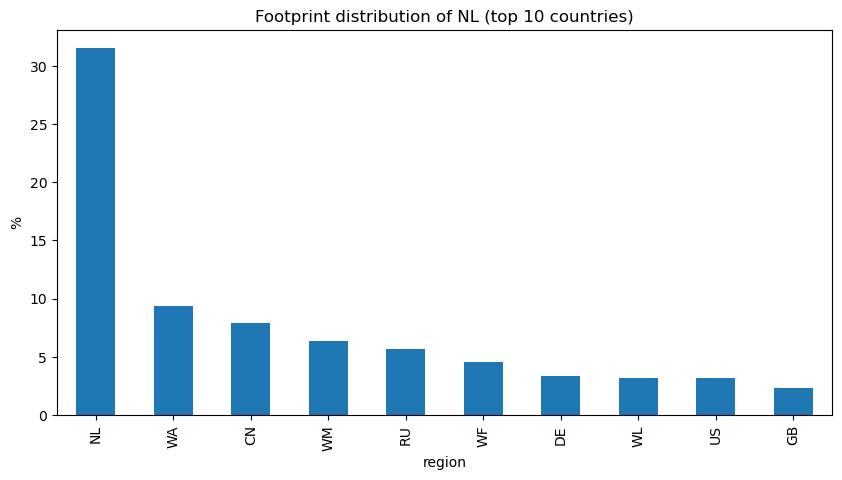

In [22]:
# Plot results in percentage
# ! normalized we only include CBA emissions (and not F_y)
(100 * result_top_n / result.sum(axis=0)).plot(
    figsize = (10,5),
    kind = 'bar',
    ylabel = "%",
    # ylabel = F_unit.loc[GWP100].values, #
    title = f"Footprint distribution of {country} (top {n} countries)",
)

But don't confuse 
- $\mathbf{fL\hat{Y}}$ 
- $\mathbf{fLY}$

In [23]:
# This is correct
fLY_gwp100 + F_y_gwp100

# ! this is NOT correct, even though it will NOT throw an error
diagfLY_gwp100 + F_y_gwp100  # this will add F_y to each row of diagfLY

# Reminder 
print(f"diagfLY: {diagfLY_gwp100.shape}")
print(f"F_y: {F_y_gwp100.shape}")

diagfLY: (9800, 343)
F_y: (343,)


## Going further
### Embodied Emissions in Trade (EET)

In [24]:
# We need to group diag(f) @LY by regions both along indexes and columns
embodied_emissions_trade = diagfLY_gwp100.groupby('region', axis=1).sum()
embodied_emissions_trade = embodied_emissions_trade.groupby('region', axis=0).sum()

# Display results
embodied_emissions_trade

region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ,...,SK,TR,TW,US,WA,WE,WF,WL,WM,ZA
region,,,,,,,,,,,,,,,,,,,,,
AT,"45,470,380,183.83","203,484,954.73","268,673,194.05","120,253,732.35","262,098,281.09","275,681,872.51","684,220,212.99","1,609,263,546.83","14,196,201.50","500,871,958.42",...,"414,780,392.46","395,817,418.75","104,477,425.15","2,200,976,730.76","979,954,407.93","867,827,401.04","409,618,870.97","379,294,515.92","1,138,354,843.49","92,437,984.40"
AU,"361,629,255.30","380,542,247,116.22","1,037,807,586.82","78,591,190.49","1,708,326,656.79","2,334,093,832.08","610,322,120.30","78,586,644,693.24","24,965,917.14","221,019,998.39",...,"83,362,570.82","1,560,175,807.66","7,189,385,433.86","25,698,322,584.22","36,495,986,444.83","758,884,165.66","3,910,891,715.10","3,220,113,198.28","13,787,741,289.23","952,964,157.05"
BE,"492,674,722.15","336,192,382.06","35,885,303,572.30","85,968,538.29","540,069,837.43","618,888,907.99","1,207,802,076.75","2,962,806,878.73","28,840,174.71","325,879,373.97",...,"136,772,915.12","516,389,596.81","118,435,119.69","5,271,149,367.13","2,117,262,431.40","457,519,062.21","2,967,428,376.17","842,170,861.93","2,459,747,684.52","315,183,789.14"
BG,"396,125,964.86","89,455,916.70","348,012,198.35","20,148,944,542.76","115,732,263.87","168,401,483.26","155,447,631.57","1,531,261,126.47","32,464,220.34","231,002,120.29",...,"124,435,165.06","1,508,707,784.18","79,307,378.96","1,403,159,392.09","1,951,889,648.65","1,945,070,821.25","924,538,196.07","614,980,920.69","1,964,258,552.12","317,958,715.95"
BR,"429,519,870.63","928,145,949.32","1,425,236,560.17","65,985,760.17","773,511,815,659.28","2,790,179,052.94","498,378,353.99","74,911,139,279.35","75,190,185.03","251,178,355.19",...,"120,830,039.73","8,690,149,826.84","7,204,994,474.90","27,653,916,085.35","29,947,793,175.58","1,567,961,358.89","8,154,404,005.43","37,641,098,217.18","45,084,093,105.50","1,045,658,565.59"
CA,"238,778,262.36","865,668,288.55","1,047,072,952.03","53,580,714.90","2,905,062,538.23","320,798,595,625.67","419,797,122.01","24,513,780,800.51","20,401,831.24","159,261,770.75",...,"55,034,558.13","689,313,554.29","1,774,562,523.55","221,722,572,996.11","8,692,468,978.07","778,861,414.95","3,265,382,878.98","13,025,264,482.86","4,666,946,297.56","462,571,484.21"
CH,"341,164,886.99","132,116,923.10","287,434,858.64","25,984,103.03","178,246,904.56","254,591,459.37","20,686,802,631.50","960,856,765.16","8,089,544.91","81,824,900.36",...,"32,200,252.72","105,832,049.00","59,824,558.32","3,145,840,939.44","995,382,015.87","324,831,148.40","285,530,325.10","274,552,208.91","750,501,725.75","54,417,884.69"
CN,"4,689,230,035.51","33,121,994,268.97","11,790,664,150.25","1,133,084,311.64","35,315,226,227.11","41,541,424,941.99","6,335,427,843.09","10,020,617,082,709.81","266,661,069.80","4,718,303,673.33",...,"1,695,527,974.89","16,135,025,721.70","4,327,176,039.61","406,543,806,475.17","504,612,038,558.24","13,619,972,393.68","84,880,607,235.58","92,730,784,442.16","156,395,212,127.77","11,018,781,754.24"
CY,"131,420,393.87","68,616,862.90","93,908,675.57","52,603,596.14","52,192,134.58","55,101,670.05","100,135,841.19","364,468,493.77","3,606,967,233.46","57,021,849.76",...,"21,800,536.14","86,536,601.89","24,286,001.46","666,899,747.00","198,488,989.17","136,918,597.61","124,969,127.60","103,280,613.24","627,387,243.27","19,058,439.49"


In [25]:
# export are calculate by adding columns together
exports = embodied_emissions_trade.sum(axis=1)
# imports are calculate by adding rows together
imports = embodied_emissions_trade.sum(axis=0)

# Check net import of a country
country = 'NL'
(imports- exports)[country]

35733120563.55267

#### Regional share of import in Footprint

In [26]:
# Share of import origin (Select by COLUMNS)
region_import_share = embodied_emissions_trade.divide(imports, axis=1)

if not np.allclose(region_import_share.sum(axis=0), 1):
    raise ValueError("Total origin != 100% for some regions")

# Display top n-th results
region_import_share.loc[:, country].nlargest(10)

region
NL   0.31
WA   0.09
CN   0.08
WM   0.06
RU   0.06
WF   0.05
DE   0.03
WL   0.03
US   0.03
GB   0.02
Name: NL, dtype: float64

#### Share of Export in territorial EP

In [27]:
# Share of export destination (Select by INDEX)
region_export_share = embodied_emissions_trade.divide(exports, axis=0)

if not np.allclose(region_export_share.sum(axis=1), 1):
    raise ValueError("Total destination != 100% for some regions")

# Display top n-th results
region_export_share.loc[country].nlargest(10)

region
NL   0.38
DE   0.08
GB   0.06
US   0.05
CN   0.05
FR   0.04
BE   0.04
WA   0.04
WM   0.03
WF   0.02
Name: NL, dtype: float64

### Calculations accross several indicators and/or regions
#### Breakdown of several indicators for a single region

In [28]:
# Select the  indicators we are interested in

GHG = [
    'Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
    'Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
    'Nitrous Oxide (N2O) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
]

f_gwp100 = f.loc[GWP100]  # single indicator
f_ghg = f.loc[GHG]  # multiple indicators

In [29]:
# remember that when calculcating diagf @ LY, only 1 side can be matrix (i.e. pd.DataFrame), not both
# the other side has to be a vector (i.e. pd.Series)
country = 'NL'
LY_1country = LY.loc[:, country].sum(axis=1)

# np.diag(f) @ L @ Y  = f * (L @ Y).T 
diagfLY_ghg_1country = f_ghg * LY_1country.T  # ! the right side of * needs to be transposed if it contains multiple columns
diagfLY_ghg_1country = diagfLY_ghg_1country.T # retranspose to conserve original layout
diagfLY_ghg_1country

impact                                                    Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region sector                                                                                                                                                    
AT     Paddy rice                                                                                      0.00                                                      
       Wheat                                                                                           1.77                                                      
       Cereal grains nec                                                                               1.65                                                      
       Vegetables, fruit, nuts                                                                         0.45                                                      
       Oil seeds                                                                                       0.48                                                      
...                                                                                                     ...                                                      
WM     Membership organisation services n.e.c. (91)                                                    0.08                                                      
       Recreational, cultural and sporting services (92)                                               0.47                                                      
       Other services (93)                                                                             1.57                                                      
       Private households with employed persons (95)                                                   0.16                                                      
       Extra-territorial organizations and bodies                                                      0.00                                                      

impact                                                    Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region sector                                                                                                                                                   
AT     Paddy rice                                                                                      0.00                                                     
       Wheat                                                                                           0.00                                                     
       Cereal grains nec                                                                               0.00                                                     
       Vegetables, fruit, nuts                                                                         0.00                                                     
       Oil seeds                                                                                       0.00                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                    0.03                                                     
       Recreational, cultural and sporting services (92)                                               0.41                                                     
       Other services (93)                                                                             0.28                                                     
       Private households with employed persons (95)                                                   0.01               

#### Breakdown of a several indicators for multiple regions

- we can no longer use the tricks above to vectorize (~parallelize) calculations
- we have to use a `for` loop (ideally, accross the smallest sequence between indicators and regions) 

In [30]:
countries = ['US', 'CN']

# Create multiindex for future pd.DataFrame
column_labels = pd.MultiIndex.from_product(
    iterables=[countries, GHG], 
    names=['region', 'stressor']
)

# Create empty DataFrame
diagfLY_ghg_countries = pd.DataFrame(
    data=np.nan,
    index=region_and_sector_labels,
    columns=column_labels
)

# Multiple indicators x 1 country at a time
for country in countries:
    LY_1country = LY.loc[:, country].sum(axis=1)
    diagfLY_ghg_1country = f_ghg * LY_1country.T  # ! the right side of * needs to be transposed if it contains multiple columns
    diagfLY_ghg_1country = diagfLY_ghg_1country.T  # retranspose to conserve original layout
    diagfLY_ghg_countries.loc[:, country] = diagfLY_ghg_1country.values

diagfLY_ghg_countries

region                                                                                                                                                     US  \
stressor                                                 Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)   
region sector                                                                                                                                                   
AT     Paddy rice                                                                                      0.00                                                     
       Wheat                                                                                           7.89                                                     
       Cereal grains nec                                                                               8.54                                                     
       Vegetables, fruit, nuts                                                                         1.28                                                     
       Oil seeds                                                                                       0.99                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                    0.96                                                     
       Recreational, cultural and sporting services (92)                                              10.90                                                     
       Other services (93)                                                                            16.84                                                     
       Private households with employed persons (95)                                                   1.25                                                     
       Extra-territorial organizations and bodies                                                      0.00                                                     

region                                                                                                                                                        \
stressor                                                 Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)   
region sector                                                                                                                                                  
AT     Paddy rice                                                                                      0.00                                                    
       Wheat                                                                                           0.01                                                    
       Cereal grains nec                                                                               0.01                                                    
       Vegetables, fruit, nuts                                                                         0.00                                                    
       Oil seeds                                                                                       0.00                                                    
...                                                                                                     ...                                                    
WM     Membership organisation services n.e.c. (91)                                                    0.32                                                    
       Recreational, cultural and sporting services (92)                                               9.40                                      

In [31]:
# We can also swap the columns levels
countries = ['US', 'CN']

# Create multiindex for future pd.DataFrame
column_labels_swap = pd.MultiIndex.from_product(
    iterables=[GHG, countries],   # we swap the order
    names=['stressor', 'region']
)

# Create empty DataFrame 
diagfLY_ghg_countries = pd.DataFrame(
    data=np.nan,
    index=region_and_sector_labels,
    columns=column_labels_swap
)

# 1 indicator x multiple countries at a time
for indicator in GHG:
    f_indicator = f.loc[indicator]
    diagfLY_indicator = f_indicator * LY.T  # ! the right side of * needs to be transposed if it contains multiple columns
    diagfLY_indicator = diagfLY_indicator.T  # retranspose to conserve original layout
    diagfLY_indicator = diagfLY_indicator.loc[:, countries].groupby('region', axis=1).sum()
    diagfLY_ghg_countries.loc[:, indicator] = diagfLY_indicator.values

diagfLY_ghg_countries

stressor                                                 Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region                                                                                                                                                     US   
region sector                                                                                                                                                   
AT     Paddy rice                                                                                      0.00                                                     
       Wheat                                                                                           1.83                                                     
       Cereal grains nec                                                                               2.20                                                     
       Vegetables, fruit, nuts                                                                         0.20                                                     
       Oil seeds                                                                                       1.59                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                    0.48                                                     
       Recreational, cultural and sporting services (92)                                               3.43                                                     
       Other services (93)                                                                             9.83                                                     
       Private households with employed persons (95)                                                   1.53                                                     
       Extra-territorial organizations and bodies                                                      0.00                                                     

stressor                                                        \
region                                                      CN   
region sector                                                    
AT     Paddy rice                                         0.00   
       Wheat                                              7.89   
       Cereal grains nec                                  8.54   
       Vegetables, fruit, nuts                            1.28   
       Oil seeds                                          0.99   
...                                                        ...   
WM     Membership organisation services n.e.c. (91)       0.96   
       Recreational, cultural and sporting services (92) 10.90   
       Other services (93)                               16.84   
       Private households with employed persons (95)      1.25   
       Extra-territorial organizations and bodies         0.00   

stressor                                                 Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region                                                                                                                                                    US   
region sector                                                                                                                                                  
AT     Paddy rice                                                                                      0.00                                                    
       Wheat                                                                                           0.00                                                    
       Cereal grains